In [1]:
# !pip install keras tensorflow bayesian_optimization

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import random
import sys
from typing import List, Union

import matplotlib.pyplot as plt
import numpy as np
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from wisard.encoders import ThermometerEncoder, encode_dataset
from wisard.wisard import WiSARD, model_from_coded_mental_image
from wisard.utils import untie, get_random_permutation, permute_dataset_bits
from wisard.optimize import find_best_bleach_bayesian, find_best_bleach_bin_search

from wisard.data import IrisDataset
from keras.datasets import mnist, fashion_mnist


%matplotlib inline

2022-08-29 16:58:51.718982: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-29 16:58:51.719001: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
def display_mnist_dist(X,
                         y,
                         figsize=(16, 8),
                         vmin: float = None,
                         vmax: float = None,
                         cmap: str = "gray"):
    fig, axs = plt.subplots(2, 5, figsize=figsize, constrained_layout=True)

    for d in range(10):
        values = {i: 0 for i in range(0, 256)}
        numbers = [x for x, y  in zip(x_train, y_train) if y == d]

        for x in numbers:
            unique = np.unique(x, return_counts=True)
            for i, c in zip(*unique):
                values[i] += c

        xs = [i for i in range(0, 256)]
        ys = [values[i] for i in range(0, 256)]
        im = axs[d%2, d%5].plot(xs,ys)
        print(d)
    plt.show()

0
1
2
3
4
5
6
7
8
9


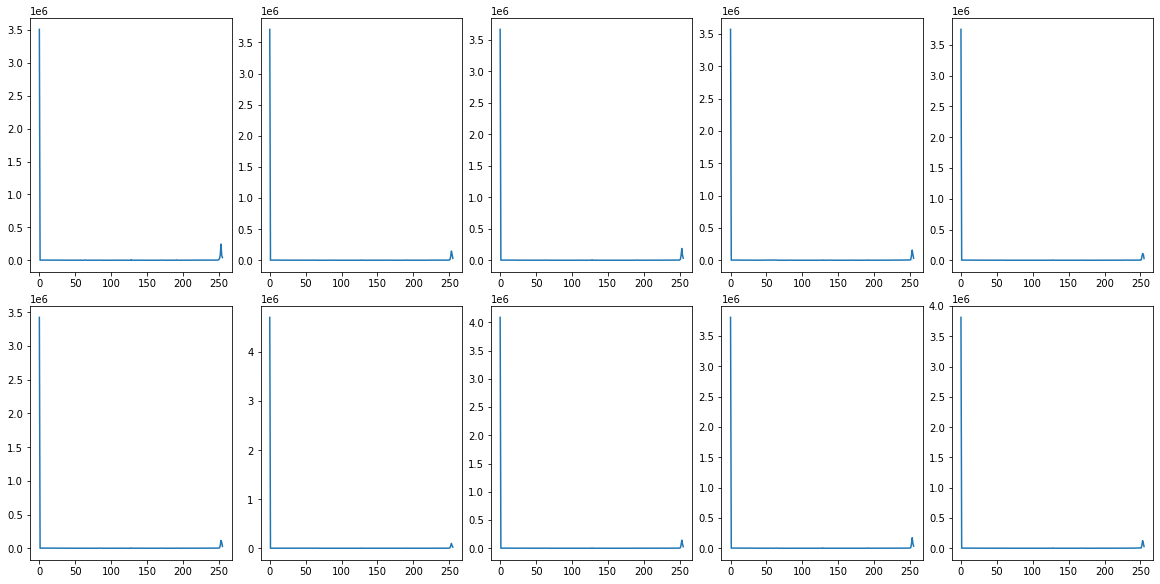

In [8]:
display_mnist_dist(x_train, y_train)

# Permute

In [9]:
permutation = np.arange(np.unpackbits(x_train[0]).size)
permutation = np.random.permutation(permutation)
x_train = permute_dataset_bits(x_train, permutation)
x_test  = permute_dataset_bits(x_test, permutation)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 115052.71it/s]


0
1
2
3
4
5
6
7
8
9


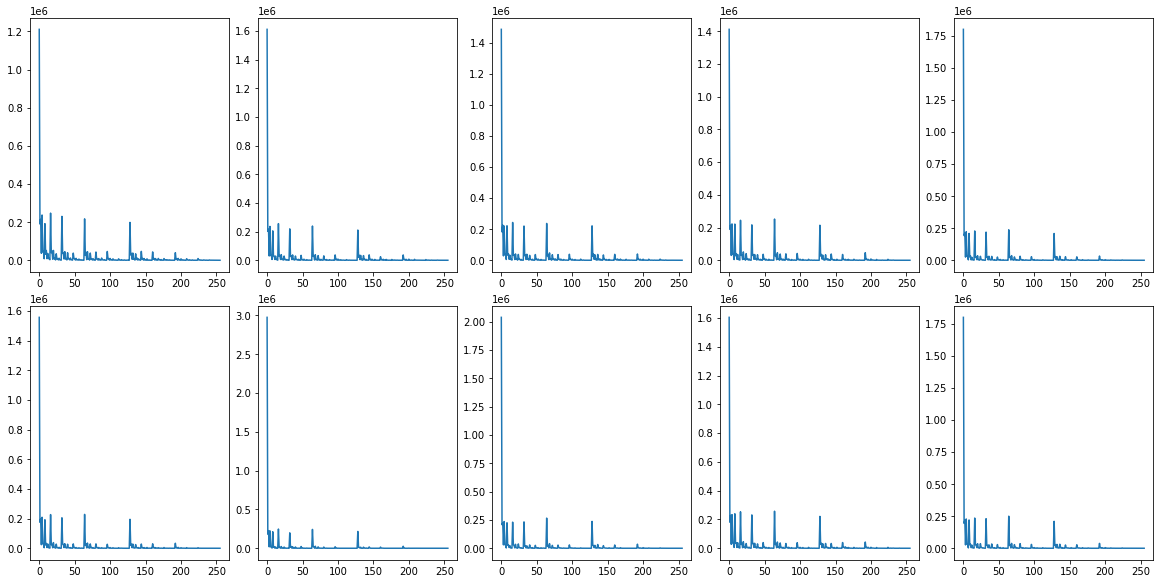

In [10]:
display_mnist_dist(x_train, y_train)